## Deep Learning Model

In [0]:
simplified_dataset_url = "https://raw.githubusercontent.com/vishal-pandey/ml-and-ds/master/datasets/delhi_weather_simplified.csv"

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error

In [0]:
df1 = pd.read_csv(simplified_dataset_url)
df1['datetime_utc'] = pd.to_datetime(df1['datetime_utc'])
df1.set_index('datetime_utc', inplace= True)

### Data gereration


In [0]:
myTemperature = df1.iloc[:, -1].values
myData = df1.iloc[:, [0, 1, 2, 3, 4, 5, 6]]
myData1 = df1.iloc[:, [7]]

In [0]:
N = 25
O = 5
P = 25

In [0]:
X_multi = []
X_uni = []
y = []
for i in range(len(myData) - (N + O + P)):
  # temp = []
  # temp.append(pm25[i : i+N] + [0 for _ in range(O)] + pm25[i+N+O : i+N+O+P])
  temp1 = myData[i : i+N]
  temp2 = [[0 for __ in range(7)] for _ in range(O)]
  temp3 = myData[i+N+O : i+N+O+P]
  X_multi.append(np.append(np.append(temp1, temp2), temp3))

  temp1 = myData1[i : i+N]
  temp2 = [[0 for __ in range(1)] for _ in range(O)]
  temp3 = myData1[i+N+O : i+N+O+P]
  X_uni.append(np.append(np.append(temp1, temp2), temp3))
  
  y.append(myTemperature[i+N : i+N+O])


In [0]:
X_uni = np.array(X_uni)
X_multi = np.array(X_multi)
y = np.array(y)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train_uni, X_test_uni, y_train, y_test = train_test_split(X_uni, y, shuffle=False)
X_train_multi, X_test_multi, y_train, y_test = train_test_split(X_multi, y, shuffle=False)

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler_X_train_uni = StandardScaler()
scaler_X_train_uni.fit(X_train_uni)
X_train_uni = scaler_X_train_uni.transform(X_train_uni)

scaler_X_train_multi = StandardScaler()
scaler_X_train_multi.fit(X_train_multi)
X_train_multi = scaler_X_train_multi.transform(X_train_multi)

scaler_X_test_uni = StandardScaler()
scaler_X_test_uni.fit(X_test_uni)
X_test_uni = scaler_X_test_uni.transform(X_test_uni)

scaler_X_test_multi = StandardScaler()
scaler_X_test_multi.fit(X_test_multi)
X_test_multi = scaler_X_test_multi.transform(X_test_multi)

scaler_y_train = StandardScaler()
scaler_y_train.fit(y_train)
y_train = scaler_y_train.transform(y_train)

scaler_y_test = StandardScaler()
scaler_y_test.fit(y_test)
y_test = scaler_y_test.transform(y_test)

In [0]:
X_train_uni = X_train_uni.reshape(X_train_uni.shape[0], 1, N+O+P)
X_test_uni = X_test_uni.reshape(X_test_uni.shape[0], 1, N+O+P)

X_train_multi = X_train_multi.reshape(X_train_multi.shape[0], 7, N+O+P)
X_test_multi = X_test_multi.reshape(X_test_multi.shape[0], 7, N+O+P)


### LSTM Model

In [13]:
from keras.layers import LSTM, Bidirectional, Dropout
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D

Using TensorFlow backend.


#### Univariate LSTM Model

In [14]:
model = Sequential()
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(O))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [15]:
model.fit(X_train_uni, y_train, epochs=20, verbose=1)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/20





5460/5460 [==============================] - 12s 2ms/step - loss: 0.2212 - acc: 0.2156
Epoch 2/20
5460/5460 [==============================] - 1s 244us/step - loss: 0.1294 - acc: 0.2821
Epoch 3/20
5460/5460 [==============================] - 2s 300us/step - loss: 0.1244 - acc: 0.3130
Epoch 4/20
5460/5460 [==============================] - 2s 275us/step - loss: 0.1206 - acc: 0.3310
Epoch 5/20
5460/5460 [==============================] - 1s 267us/step - loss: 0.1192 - acc: 0.3500
Epoch 6/20
5460/5460 [==============================] - 1s 248us/step - loss: 0.1173 - acc: 0.3529
Epoch 7/20
5460/5460 [==============================] - 2s 292us/step - loss: 0.1173 - acc: 0.3482
Epoch 8/20
5460/5460 [==============================] - 1s 251us/step - loss: 0.1163 - acc: 0.3579
Epoch 9/20
5460/5460 [==============================] - 2s 278us/step - loss: 0.1156 - acc: 0.3625
Epoch 

In [0]:
y_hat_train = model.predict(X_train_uni)
y_hat_test = model.predict(X_test_uni)

##### Prediction on training data

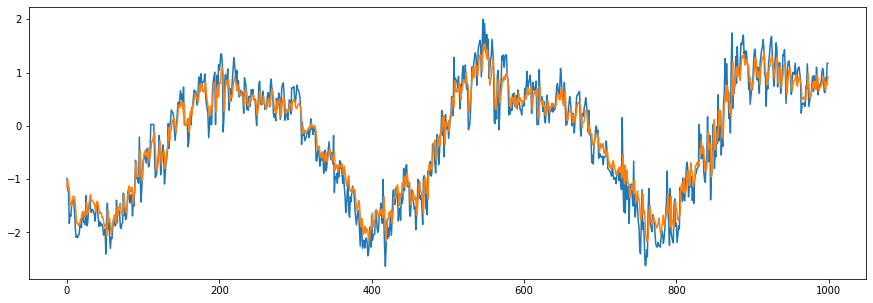

In [17]:
plt.figure(figsize=(15, 5))
plt.plot(y_train[:1000, 0])
plt.plot(y_hat_train[:1000, 0])
plt.show()

##### Prediction on testing data

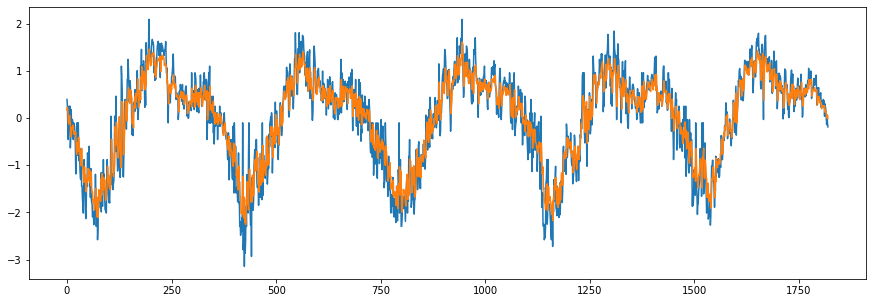

In [18]:
plt.figure(figsize=(15, 5))
plt.plot(y_test[:4000, 0])
plt.plot(y_hat_test[:4000, 0])
plt.show()

In [20]:
# Training MSE score
mean_squared_error(y_train ,y_hat_train)

0.11253413633820519

In [22]:
# Testing MSE Score
mean_squared_error(y_test ,y_hat_test)

0.16075520183132405

#### Multivariate LSTM Model

In [0]:
model = Sequential()
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dense(O))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [24]:
model.fit(X_train_multi, y_train, epochs=20, verbose=1)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch 1/20
5460/5460 [==============================] - 5s 999us/step - loss: 0.3069 - acc: 0.2046
Epoch 2/20
5460/5460 [==============================] - 5s 884us/step - loss: 0.1748 - acc: 0.2434
Epoch 3/20
5460/5460 [==============================] - 5s 860us/step - loss: 0.1563 - acc: 0.2423
Epoch 4/20
5460/5460 [==============================] - 4s 780us/step - loss: 0.1480 - acc: 0.2621
Epoch 5/20
5460/5460 [==============================] - 4s 747us/step - loss: 0.1383 - acc: 0.2639
Epoch 6/20
5460/5460 [==============================] - 4s 789us/step - loss: 0.1321 - acc: 0.2722
Epoch 7/20
5460/5460 [==============================] - 5s 839us/step - loss: 0.1270 - acc: 0.2800
Epoch 8/20
5460/5460 [==============================] - 5s 832us/step - loss: 0.1230 - acc: 0.2826
Epoch 9/20
5460/5460 [==============================] - 4s 786us/step - loss: 0.1193 - acc: 

In [0]:
y_hat_train = model.predict(X_train_multi)
y_hat_test = model.predict(X_test_multi)

##### Prediction on training data

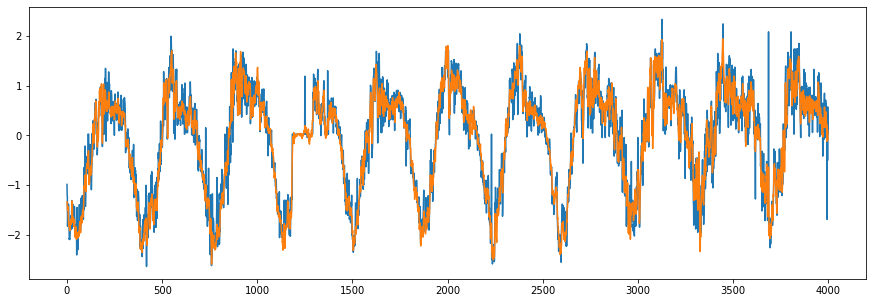

In [26]:
plt.figure(figsize=(15, 5))
plt.plot(y_train[:4000, 0])
plt.plot(y_hat_train[:4000, 0])
plt.show()

##### Prediction on testing data

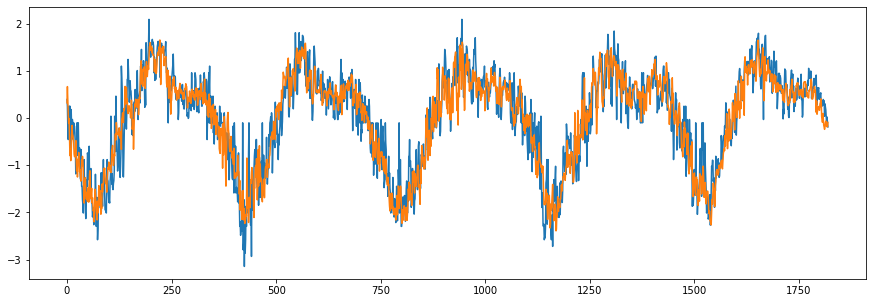

In [27]:
plt.figure(figsize=(15, 5))
plt.plot(y_test[:4000, 0])
plt.plot(y_hat_test[:4000, 0])
plt.show()

In [28]:
# Training MSE score
mean_squared_error(y_train ,y_hat_train)

0.07556282498226437

In [29]:
# Testing MSE Score
mean_squared_error(y_test ,y_hat_test)


0.20934162267331552

#### Univariate LSTM Model (Bidirectional)

In [0]:
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(LSTM(32))
model.add(Dense(5))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [31]:
model.fit(X_train_uni, y_train, epochs=20, verbose=1)

Epoch 1/20
5460/5460 [==============================] - 4s 684us/step - loss: 0.2316 - acc: 0.2236
Epoch 2/20
5460/5460 [==============================] - 2s 344us/step - loss: 0.1319 - acc: 0.2689
Epoch 3/20
5460/5460 [==============================] - 2s 368us/step - loss: 0.1247 - acc: 0.3132
Epoch 4/20
5460/5460 [==============================] - 2s 394us/step - loss: 0.1204 - acc: 0.3383
Epoch 5/20
5460/5460 [==============================] - 2s 360us/step - loss: 0.1181 - acc: 0.3515
Epoch 6/20
5460/5460 [==============================] - 2s 343us/step - loss: 0.1173 - acc: 0.3498
Epoch 7/20
5460/5460 [==============================] - 2s 339us/step - loss: 0.1168 - acc: 0.3584
Epoch 8/20
5460/5460 [==============================] - 2s 342us/step - loss: 0.1157 - acc: 0.3548
Epoch 9/20
5460/5460 [==============================] - 2s 340us/step - loss: 0.1150 - acc: 0.3612
Epoch 10/20
5460/5460 [==============================] - 2s 373us/step - loss: 0.1142 - acc: 0.3628
Epoch 11/

In [0]:
y_hat_train = model.predict(X_train_uni)
y_hat_test = model.predict(X_test_uni)

##### Prediction on training data

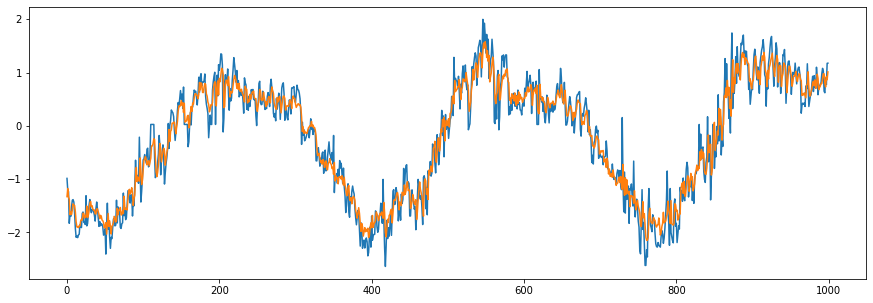

In [33]:
plt.figure(figsize=(15, 5))
plt.plot(y_train[:1000, 0])
plt.plot(y_hat_train[:1000, 0])
plt.show()

##### Prediction on testing data

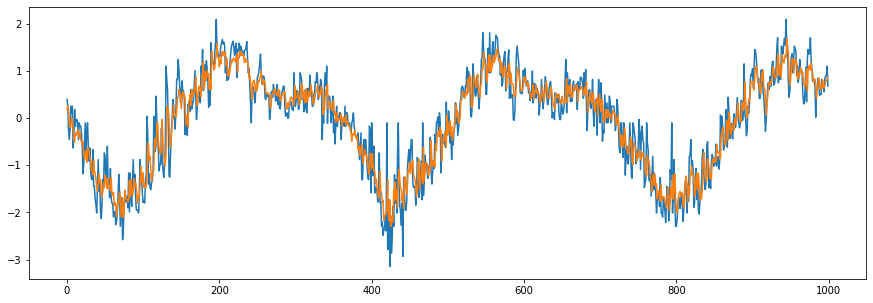

In [34]:
plt.figure(figsize=(15, 5))
plt.plot(y_test[:1000, 0])
plt.plot(y_hat_test[:1000, 0])
plt.show()

In [35]:
# Training MSE score
mean_squared_error(y_train ,y_hat_train)

0.10706412167635962

In [36]:
# Testing MSE Score
mean_squared_error(y_test ,y_hat_test)

0.15722054498547236

#### Multivariate LSTM Model (Bidirectional)

In [0]:
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(LSTM(32))
model.add(Dense(5))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [38]:
model.fit(X_train_multi, y_train, epochs=20, verbose=1)

Epoch 1/20
5460/5460 [==============================] - 8s 1ms/step - loss: 0.3141 - acc: 0.2178
Epoch 2/20
5460/5460 [==============================] - 7s 1ms/step - loss: 0.1777 - acc: 0.2348
Epoch 3/20
5460/5460 [==============================] - 7s 1ms/step - loss: 0.1596 - acc: 0.2549
Epoch 4/20
5460/5460 [==============================] - 6s 1ms/step - loss: 0.1504 - acc: 0.2570
Epoch 5/20
5460/5460 [==============================] - 6s 1ms/step - loss: 0.1429 - acc: 0.2782
Epoch 6/20
5460/5460 [==============================] - 6s 1ms/step - loss: 0.1367 - acc: 0.2683
Epoch 7/20
5460/5460 [==============================] - 6s 1ms/step - loss: 0.1326 - acc: 0.2789
Epoch 8/20
5460/5460 [==============================] - 6s 1ms/step - loss: 0.1275 - acc: 0.2760
Epoch 9/20
5460/5460 [==============================] - 6s 1ms/step - loss: 0.1243 - acc: 0.2886
Epoch 10/20
5460/5460 [==============================] - 6s 1ms/step - loss: 0.1218 - acc: 0.2945
Epoch 11/20
5460/5460 [======

In [0]:
y_hat_train = model.predict(X_train_multi)
y_hat_test = model.predict(X_test_multi)

##### Prediction on training data

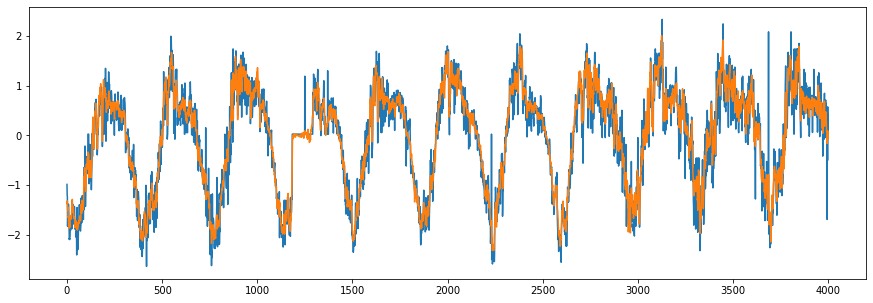

In [40]:
plt.figure(figsize=(15, 5))
plt.plot(y_train[:4000, 0])
plt.plot(y_hat_train[:4000, 0])
plt.show()

##### Prediction on testing data

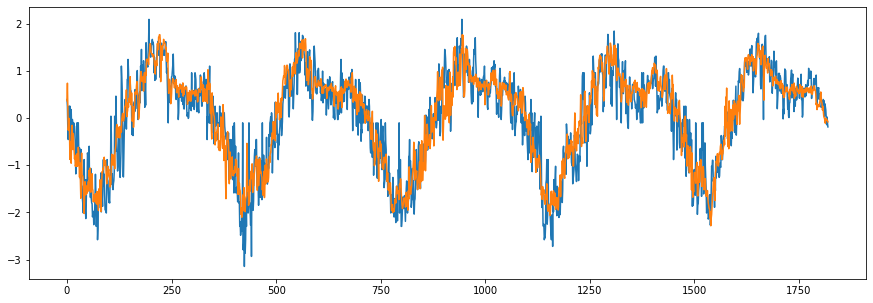

In [41]:
plt.figure(figsize=(15, 5))
plt.plot(y_test[:4000, 0])
plt.plot(y_hat_test[:4000, 0])
plt.show()

In [42]:
# Training MSE score
mean_squared_error(y_train ,y_hat_train)

0.08476083808297034

In [43]:
# Testing MSE Score
mean_squared_error(y_test ,y_hat_test)

0.21687960025276412

#### Univariate SSIM Model

In [44]:
!pip install keras-self-attention

  Created wheel for keras-self-attention: filename=keras_self_attention-0.42.0-cp36-none-any.whl size=17296 sha256=f6d88c85f2de8c5905cec7ccd7474327e2218397beca15af7948a17213c05056
  Stored in directory: /root/.cache/pip/wheels/7b/05/a0/99c0cf60d383f0494e10eca2b238ea98faca9a1fe03cac2894
Successfully built keras-self-attention


In [0]:
from keras_self_attention import SeqSelfAttention

In [0]:
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(SeqSelfAttention(attention_activation='sigmoid'))
model.add(LSTM(32))
model.add(Dense(5))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [47]:
model.fit(X_train_uni, y_train, epochs=20, verbose=1)


Epoch 1/20
5460/5460 [==============================] - 5s 870us/step - loss: 0.2288 - acc: 0.2176
Epoch 2/20
5460/5460 [==============================] - 2s 389us/step - loss: 0.1296 - acc: 0.2892
Epoch 3/20
5460/5460 [==============================] - 2s 443us/step - loss: 0.1231 - acc: 0.3278
Epoch 4/20
5460/5460 [==============================] - 2s 432us/step - loss: 0.1197 - acc: 0.3401
Epoch 5/20
5460/5460 [==============================] - 2s 406us/step - loss: 0.1180 - acc: 0.3465
Epoch 6/20
5460/5460 [==============================] - 2s 375us/step - loss: 0.1165 - acc: 0.3535
Epoch 7/20
5460/5460 [==============================] - 2s 428us/step - loss: 0.1154 - acc: 0.3606
Epoch 8/20
5460/5460 [==============================] - 2s 393us/step - loss: 0.1158 - acc: 0.3586
Epoch 9/20
5460/5460 [==============================] - 2s 409us/step - loss: 0.1149 - acc: 0.3612
Epoch 10/20
5460/5460 [==============================] - 2s 380us/step - loss: 0.1140 - acc: 0.3593
Epoch 11

In [0]:
y_hat_train = model.predict(X_train_uni)
y_hat_test = model.predict(X_test_uni)

##### Prediction on training data

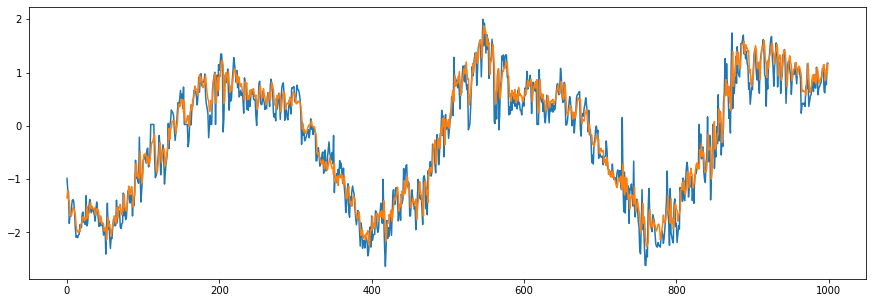

In [49]:
plt.figure(figsize=(15, 5))
plt.plot(y_train[:1000, 0])
plt.plot(y_hat_train[:1000, 0])
plt.show()

##### Prediction on testing data

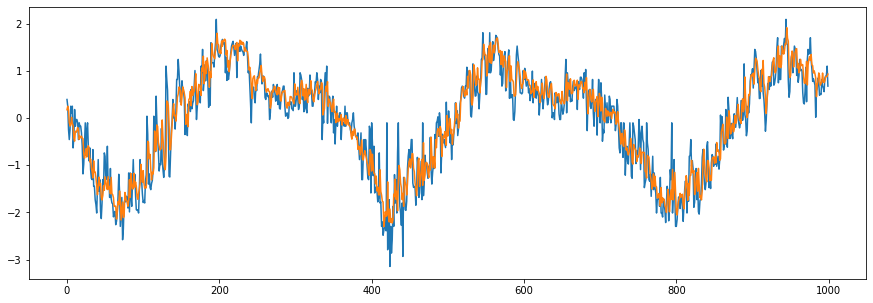

In [50]:
plt.figure(figsize=(15, 5))
plt.plot(y_test[:1000, 0])
plt.plot(y_hat_test[:1000, 0])
plt.show()

In [51]:
# Training MSE score
mean_squared_error(y_train ,y_hat_train)

0.10805430088772883

In [52]:
# Testing MSE Score
mean_squared_error(y_test ,y_hat_test)

0.15921383858040467